date                           0
country                        0
cumulative_total_cases         0
daily_new_cases            10458
active_cases               18040
cumulative_total_deaths     6560
daily_new_deaths           26937
dtype: int64


<Axes: >

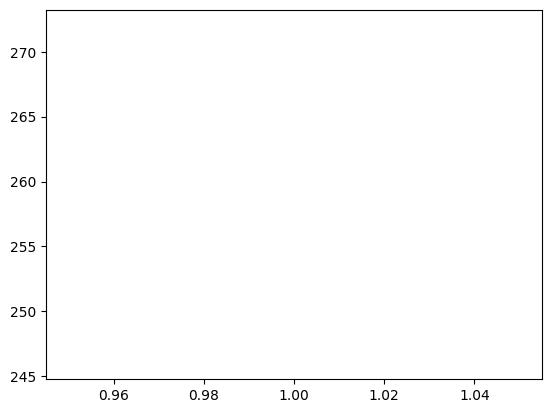

In [43]:
import pandas as pd 
import sqlite3
import os 
import matplotlib.pyplot as plt
from pathlib import Path 


# Getting Parent Directory 
PROJECT_ROOT = Path.cwd().parent

# Loading Data and creating database 
daily = str(PROJECT_ROOT/'data'/'raw'/'worldometer_coronavirus_daily_data.csv')
db_path = PROJECT_ROOT/'data'/'Database'/'covid.db'

df_daily = pd.read_csv(daily)

print(df_daily.isna().sum())

conn = sqlite3.connect(db_path)

# Loading into SQL 
df_daily.to_sql(name='covid_cases', con=conn, if_exists='replace', index=False)

query = """
SELECT * 
FROM covid_cases
WHERE country = 'China'
"""
test_df = pd.read_sql(query, conn)

test_df[0:2]['daily_new_cases'].plot()

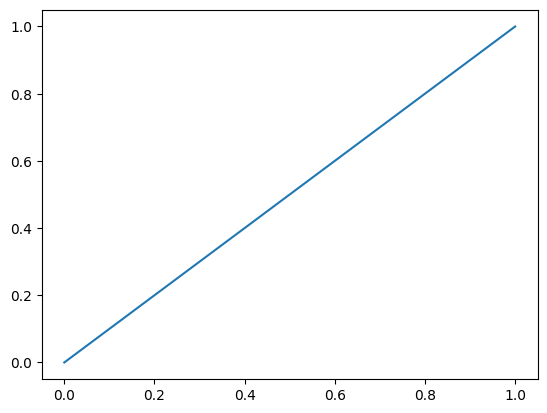